In [1]:

# đoạn code này được dùng với google colab, nếu chạy trên máy cá nhân thì bỏ qua
from google.colab import drive
import os
drive.mount('/content/drive')
my_project_dir = "./drive/My Drive/AI_Colab/YOLO"
os.chdir(my_project_dir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from tiny_yolo import *
from utils import *
import pickle
import copy
from random import randint
from matplotlib import pyplot as plt

# %load_ext autoreload
# %autoreload 2

Using TensorFlow backend.


In [0]:
from wider_preprocess import WiderPreprocess
ANNS_DIR = "./WiderDataset/WIDER_ANNS/wider_train.txt"
IMAGE_DIR = "./WiderDataset/WIDER_TRAIN/images/"
wpreprocess = WiderPreprocess(ANNS_DIR, IMAGE_DIR)

In [0]:
# run in first time
img_data = wpreprocess.get_img_data()
with open("preprocessed_data.txt", "wb") as fp:
    pickle.dump(img_data, fp)

In [0]:
# run if you run before
img_data = []
with open("preprocessed_data.txt", "rb") as fp:
    img_data = pickle.load(fp)

In [5]:
print(len(img_data))

def plot_img(img):
    plt.figure()
    plt.axis('off')
    img = np.array(img, dtype = np.uint8)
    plt.imshow(img[:, :, :: -1]) 
    plt.show() 

7370


In [17]:
# model = create_yolo_model()
# model = load_model('./trained_model/objdect2.h5', compile=False)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss = custom_loss, optimizer= adam, metrics=['mse'])

Y_pred shape: (?, 13, 13, 5, 6)
iou shape: (?, 13, 13, 5)
reduce_max shape: (?, 13, 13, 1)
best_box shape(?, 13, 13, 5)
Y_true shape: (?, 13, 13, 5, ?)
Weight shape: (?, 13, 13, 5, 6)


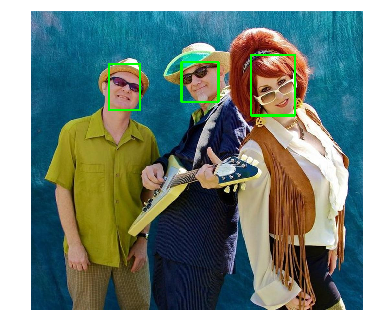

In [7]:
def draw_face_with_box(img, boxes):
    copy_image = copy.deepcopy(img)
    for box in boxes:
        cv2.rectangle(copy_image, (box[0],box[1]), (box[2],box[3]), (0,255,0), 5)
    return copy_image

def test(model, x_test):
    j = randint(0,len(x_test) - 2)
    y = model.predict(x_test)
    true_boxs = interpret_netout(x_test[j]*255, y[j])
    print(len(true_boxs))
    img = draw_face_with_box(x_test[j]*255, true_boxs)
    plot_image(img)

# demo
i = randint(0, len(img_data))
img = cv2.imread(img_data[i]['file_name'])
img = draw_face_with_box(img, img_data[i]['face_coordinate'])
plot_img(img)

In [0]:
train_data = img_data[:int(0.98*len(img_data))]
test_data = img_data[int(0.98*len(img_data)):]
x_test, y_test = data_gen(test_data, 100)




In [19]:
print(len(train_data))

7222


start train
epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
0


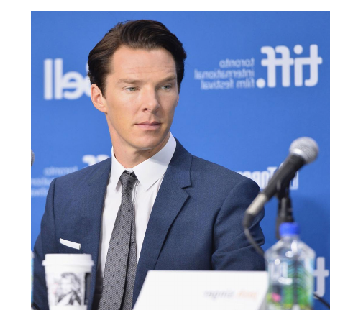

epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
0


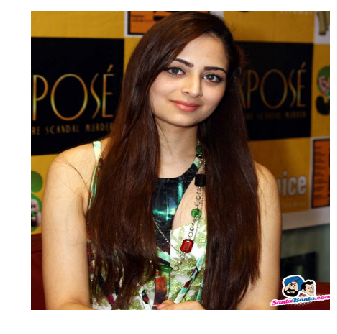

epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
0


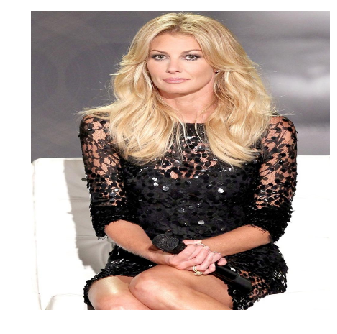

epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
0


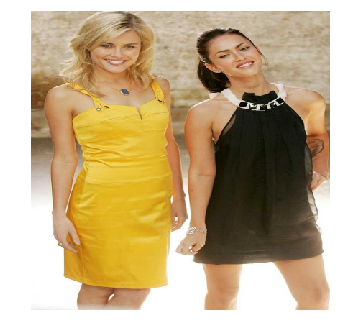

epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
0


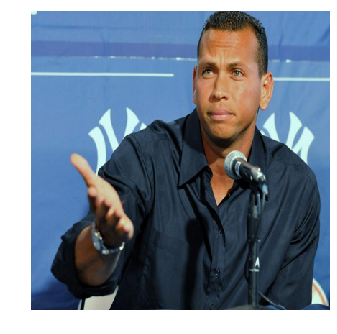

epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
0


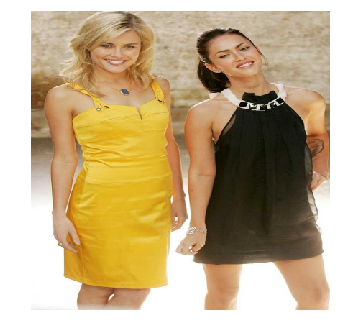

epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
0


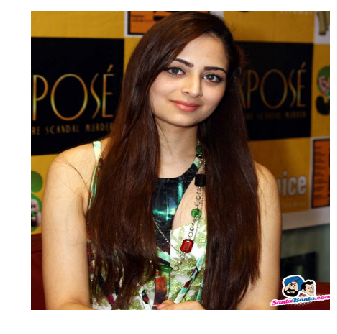

epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
0


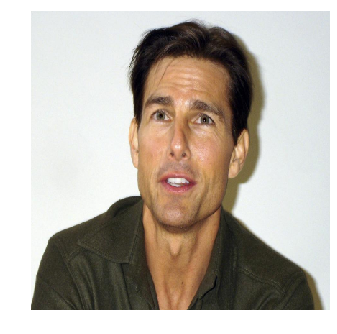

epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
0


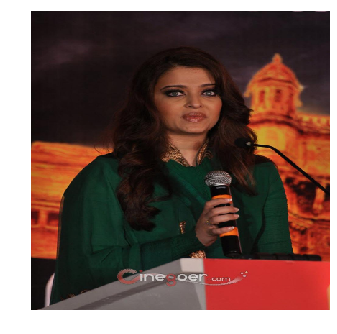

epoch: 45
epoch: 46


In [0]:
i = 0
x_batch = None
y_batch = None
model_index = 1
batch_size = 8
max_iter = 1000

print("start train")
while True:
    x_batch, y_batch = data_gen(train_data, batch_size)
    print("epoch: " + str(i))
    model.fit(x_batch, y_batch, epochs = 100, verbose = 0)
    i += 1
    if( i % 5 == 0):
        test(model, x_test)
    if(i % 50 == 0):
        model_link = "./trained_model/objdect" + str(model_index) + ".h5"
        model.save(model_link)
        model_index += 1
    if(i > max_iter):
        break